In [1]:
import numpy as np
import sncosmo
from astropy.table import Table
from matplotlib import pyplot as plt

import sys; sys.path.insert(0, '../')
from fit_sncosmo import band_index_mapping
from parse_sn_data import get_cid_data


In [20]:
def create_test_input(cid):
    all_sn_data = get_cid_data(cid)
    all_sn_data = all_sn_data[all_sn_data['FLAG'] < 1120]

    test_input = Table()
    test_input['time'] = all_sn_data['MJD']
    test_input['band'] = band_index_mapping(all_sn_data['FILT'])
    test_input['flux'] = all_sn_data['FLUX']
    test_input['fluxerr'] = all_sn_data['FLUXERR']
    test_input['zpsys'] = np.full(len(all_sn_data), 'ab')
    test_input.meta = all_sn_data.meta
    test_input.meta['classification']

    return test_input


In [21]:
def run_test(test_cid):
    test_input = create_test_input(test_cid)
    print('Test CID: {}'.format(test_cid))
    print('Classification: {}'.format(test_input.meta['classification']))
    print('Redshift: {}'.format(test_input.meta['redshift']))

    model = sncosmo.Model(source='salt2')
    model.set(z=test_input.meta['redshift'])
    params_to_fit = ('t0', 'x0', 'x1', 'c')


    # Unscaled flux with zero point of 25
    test_input['zp'] = np.full(len(test_input), 25)
    result, fitted_model = sncosmo.fit_lc(
        test_input, model, params_to_fit, bounds=None)

    print('\nUnscaled flux with zero point of 25')
    print('Chisquared: {}'.format(result.chisq))
    print('Norm Chisquared: {}'.format(result.chisq / result.ndof))
    sncosmo.plot_lc(test_input, model=fitted_model, errors=result.errors)
    plt.show()


    # Unscaled flux with zero point of 48.6
    test_input['zp'] = np.full(len(test_input), 48.6)
    result, fitted_model = sncosmo.fit_lc(
        test_input, model, params_to_fit, bounds=None)

    print('Unscaled flux with zero point of 48.6')
    print('Chisquared: {}'.format(result.chisq))
    print('Norm Chisquared: {}'.format(result.chisq / result.ndof))
    sncosmo.plot_lc(test_input, model=fitted_model, errors=result.errors)
    plt.show()

    # Scaled flux with zero point of 48.6
    test_input['flux'] *= 10**9.44
    test_input['fluxerr'] *= 10**9.44
    model = sncosmo.Model(source='salt2')
    params_to_fit = ('t0', 'x0', 'x1', 'c', 'z')
    result, fitted_model = sncosmo.fit_lc(
        test_input, model, params_to_fit, bounds = {'z': (0.1, .2)})

    print('Scaled flux with zero point of 48.6')
    print('Chisquared: {}'.format(result.chisq))
    print('Norm Chisquared: {}'.format(result.chisq / result.ndof))
    sncosmo.plot_lc(test_input, model=fitted_model, errors=result.errors)
    plt.show()


Test CID: 779
Classification: zSNIa
Redshift: 0.236938

Unscaled flux with zero point of 25
Chisquared: 96.9703381183
Norm Chisquared: 0.906264842227


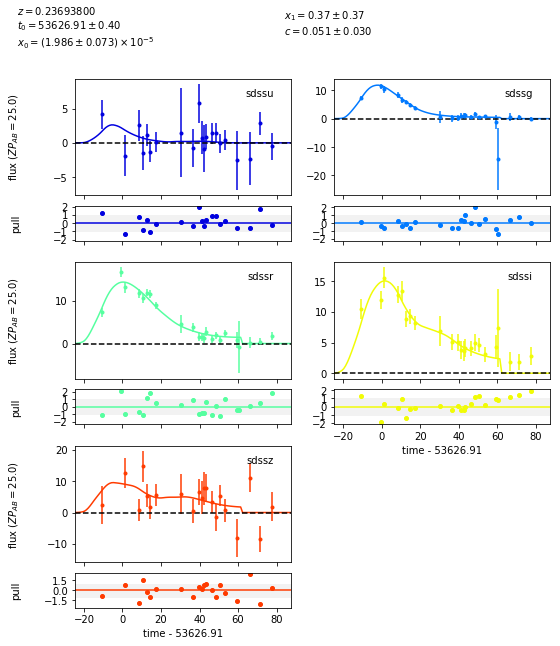

Unscaled flux with zero point of 48.6
Chisquared: 96.9703381183
Norm Chisquared: 0.906264842227


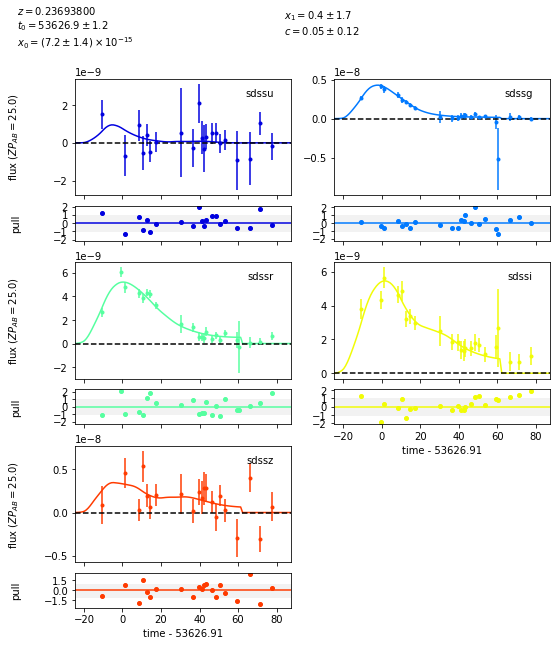

Scaled flux with zero point of 48.6
Chisquared: 75.9278641999
Norm Chisquared: 0.893268990587


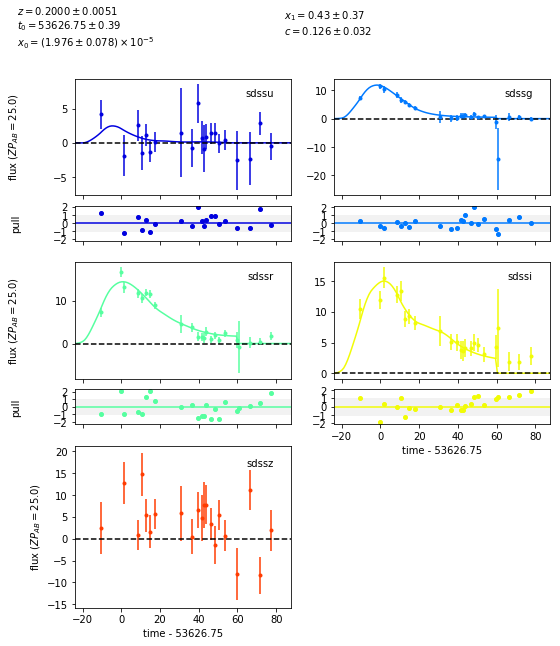

In [22]:
run_test(test_cid=779)

Test CID: 19353
Classification: SNIa
Redshift: 0.153245

Unscaled flux with zero point of 25
Chisquared: 82.2470701944
Norm Chisquared: 1.20951573815


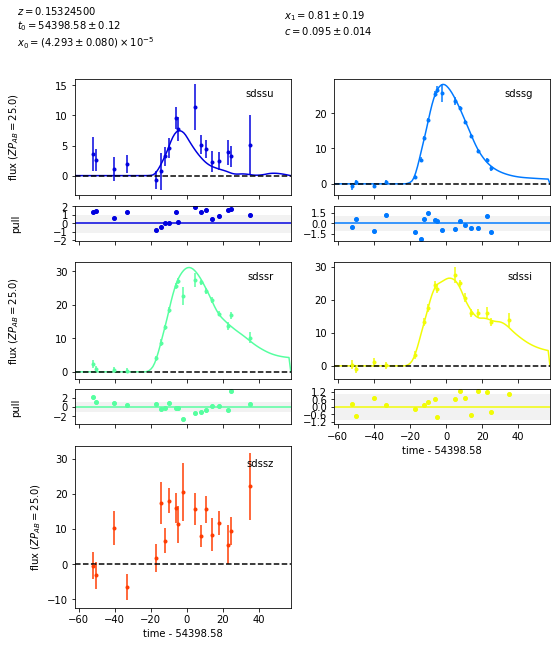

Unscaled flux with zero point of 48.6
Chisquared: 82.2470108906
Norm Chisquared: 1.20951486604


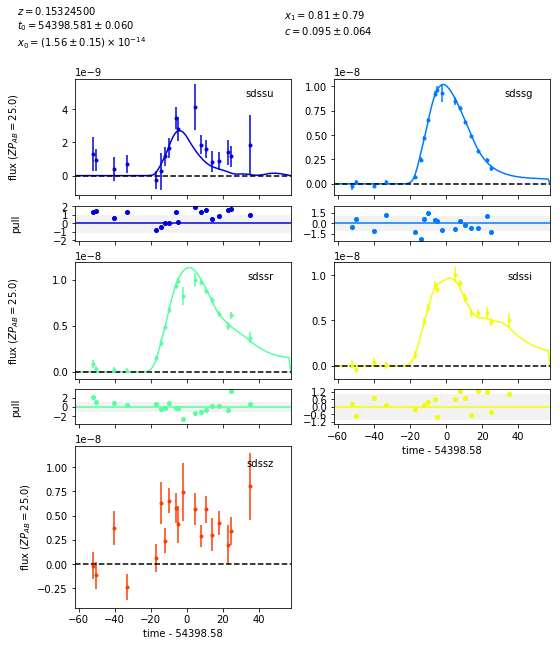

Scaled flux with zero point of 48.6
Chisquared: 77.5318072949
Norm Chisquared: 1.15719115366


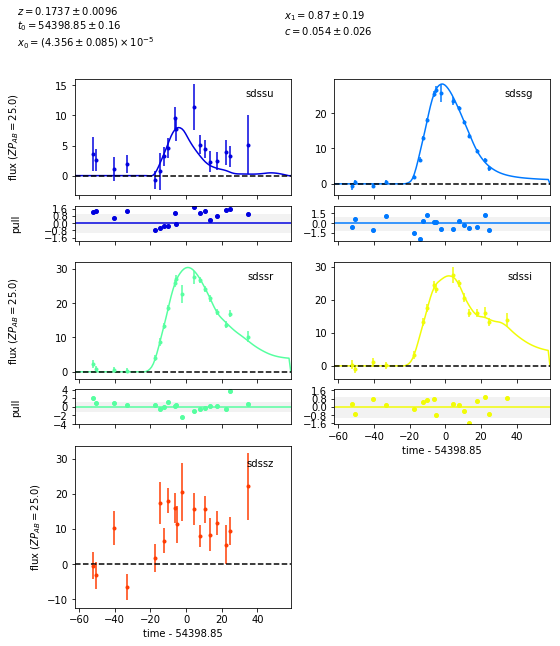

In [23]:
run_test(test_cid=19353)